In [1]:
path = "/content/drive/MyDrive/Churn_Modelling.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.drop('RowNumber' , axis='columns' , inplace = True)
df.drop('CustomerId' , axis='columns' , inplace = True)
df.drop('Surname' , axis='columns' , inplace = True)

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.Balance.values

array([     0.  ,  83807.86, 159660.8 , ...,      0.  ,  75075.31,
       130142.79])

In [9]:
pd.to_numeric(df.Balance)

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64

In [10]:
df.Balance.values

array([     0.  ,  83807.86, 159660.8 , ...,      0.  ,  75075.31,
       130142.79])

In [12]:
pd.to_numeric(df.Balance,errors='coerce').isnull()


0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Balance, Length: 10000, dtype: bool

In [16]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [18]:
df.shape

(10000, 11)

In [19]:
df[df.Exited == 1].shape

(2037, 11)

In [20]:
df[df.Exited == 0].shape

(7963, 11)

In [22]:
tenure_exited_no = df[df.Exited == 0].Tenure
tenure_exited_yes = df[df.Exited == 1].Tenure


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


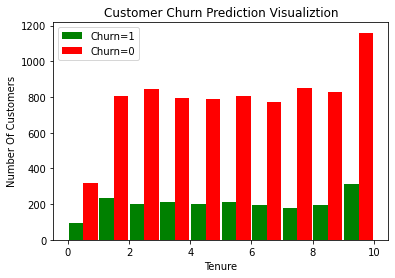

In [23]:
plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_exited_yes, tenure_exited_no], rwidth=0.95, color=['green','red'],label=['Churn=1','Churn=0'])
plt.legend()


In [24]:
def print_unique_col_values(df):
  for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [25]:
print_unique_col_values(df)


Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [27]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)


In [28]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [29]:
df.drop('Geography' , axis='columns' , inplace = True)


In [30]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1
9998,772,0,42,3,75075.31,2,1,0,92888.52,1


In [31]:
df.dtypes

CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [32]:
df.drop('Age' , axis='columns' , inplace = True)


In [34]:
cols_to_scale = ['Tenure','Balance','EstimatedSalary','CreditScore']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [35]:
for col in df:
    print(f'{col}: {df[col].unique()}')


CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [36]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [37]:
X_test.shape

(2000, 8)

In [38]:
X_train[:10]


,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7751,0.800,1,0.6,0.000000,2,0,0,0.096273
4154,0.752,0,0.3,0.000000,2,1,0,0.981478
3881,0.476,1,0.3,0.000000,1,1,1,0.948551
9238,0.846,1,0.4,0.000000,2,1,0,0.646869
5210,0.402,0,0.7,0.517012,2,0,0,0.434670
7487,0.602,1,0.4,0.000000,1,0,0,0.421898
7542,0.314,1,0.4,0.000000,2,1,1,0.303413
7524,0.620,1,0.8,0.666330,1,1,1,0.925815
9412,0.750,0,0.6,0.393324,1,0,0,0.668609
6377,0.684,0,0.9,0.000000,1,1,0,0.567526


In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:
len(X_train.columns)

8

In [50]:
model = keras.Sequential([
    keras.layers.Dense(8, input_shape=(8,), activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6382 - accuracy: 0.6379
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4929 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4834 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4812 - accuracy: 0.7961
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4792 - accuracy: 0.7962
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4774 - accuracy: 0.7964
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4756 - accuracy: 0.7958
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4730 - accura

In [51]:
model.evaluate(X_test, y_test)


63/63 [==============================] - 0s 1ms/step - loss: 0.4247 - accuracy: 0.8245


[0.4246686100959778, 0.8245000243186951]

In [54]:
from sklearn.metrics import confusion_matrix , classification_report

In [55]:
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

In [56]:
print('Classification report: \n', classification_report(y_test, y_pred_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
